In [101]:
import os
import pandas as pd
import numpy as np
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set_theme(style="whitegrid", palette="Set2")
sns.set_context("paper")
plt.rcParams['savefig.dpi'] = 300

CONLL_0_CSV_PATH = Path("data", "wandb_export_classification_report_umw65ny0_k_shot_conll_0_try2.csv")
CONLL_1_CSV_PATH = Path("data", "wandb_export_classification_report_8c6qzb6i_k_shot_conll_1_try2.csv")
MIT_0_CSV_PATH = Path("data", "wandb_export_classification_report_99qgtcqk_k_shot_mit_try2.csv")
MIT_1_CSV_PATH = Path("data", "wandb_export_classification_report_logical-moon-1240.csv")
MIT_2_CSV_PATH = Path("data", "wandb_export_classification_report_vital-hill-1241.csv")
COMB_0_CSV_PATH = Path("data", "wandb_export_classification_report_n2pyk84e_k_shot_both_50.csv")
COMB_1_CSV_PATH = Path("data", "wandb_export_classification_report_clean-star-1263.csv")
BASELINE_CSV_PATH = Path("data", "wandb_export_classification_report_zett7p18_k_shot_baseline.csv")

relevant_columns = ["micro avg", "run_name", "run_corpus", "run_type", "k_shot_num"]

In [64]:
df_conll_0 = pd.read_csv(CONLL_0_CSV_PATH)
df_conll_1 = pd.read_csv(CONLL_1_CSV_PATH)

df_conll = pd.concat([df_conll_0, df_conll_1])
df_conll = df_conll.loc[(df_conll["metric"] == "f1-score") & (df_conll["k_shot_num"] > 1), relevant_columns]
df_conll = df_conll.reset_index(drop=True)

In [65]:
df_mit_0 = pd.read_csv(MIT_0_CSV_PATH)
df_mit_1 = pd.read_csv(MIT_1_CSV_PATH)
df_mit_2 = pd.read_csv(MIT_2_CSV_PATH)

df_mit = pd.concat([df_mit_0, df_mit_1, df_mit_2])
df_mit = df_mit.loc[(df_mit["metric"] == "f1-score") & (df_mit["k_shot_num"] > 1), relevant_columns]
df_mit = df_mit.reset_index(drop=True)

In [66]:
df_comb_0 = pd.read_csv(COMB_0_CSV_PATH)
df_comb_1 = pd.read_csv(COMB_1_CSV_PATH)

df_comb = pd.concat([df_comb_0, df_comb_1])
df_comb = df_comb.loc[(df_comb["metric"] == "f1-score"), relevant_columns]
df_comb = df_comb.reset_index(drop=True)

In [67]:
df_baseline = pd.read_csv(BASELINE_CSV_PATH)

df_baseline = df_baseline.loc[df_baseline["metric"] == "f1-score", relevant_columns]
df_baseline = df_baseline.reset_index(drop=True)

In [176]:
df = pd.concat([df_conll, df_mit, df_comb, df_baseline]).reset_index(drop=True)
df.loc[df["run_corpus"] == "NER_ENGLISH_RESTAURANT", "run_corpus"] = "MIT Restaurant"
df.loc[df["run_corpus"] == "CONLL03", "run_corpus"] = "CoNLL 2003"
df.loc[df["run_type"].isna(), "run_type"] = "contrastive"
df["run_type"] = df["run_type"].str.title()
df["run_setting"] = df["run_type"] + " " + df["run_corpus"]
df

,micro avg,run_name,run_corpus,run_type,k_shot_num,run_setting
0,0.668986,major-sweep-40,CoNLL 2003,Contrastive,10,Contrastive CoNLL 2003
1,0.365868,pious-sweep-39,CoNLL 2003,Contrastive,5,Contrastive CoNLL 2003
2,0.385185,dry-sweep-38,CoNLL 2003,Contrastive,3,Contrastive CoNLL 2003
3,0.487053,leafy-sweep-36,CoNLL 2003,Contrastive,10,Contrastive CoNLL 2003
4,0.214736,gentle-sweep-35,CoNLL 2003,Contrastive,5,Contrastive CoNLL 2003
...,...,...,...,...,...,...
195,0.774758,ancient-sweep-5,CoNLL 2003,Baseline,50,Baseline CoNLL 2003
196,0.663522,misty-sweep-4,CoNLL 2003,Baseline,20,Baseline CoNLL 2003
197,0.592883,faithful-sweep-3,CoNLL 2003,Baseline,10,Baseline CoNLL 2003
198,0.291169,spring-sweep-2,CoNLL 2003,Baseline,5,Baseline CoNLL 2003


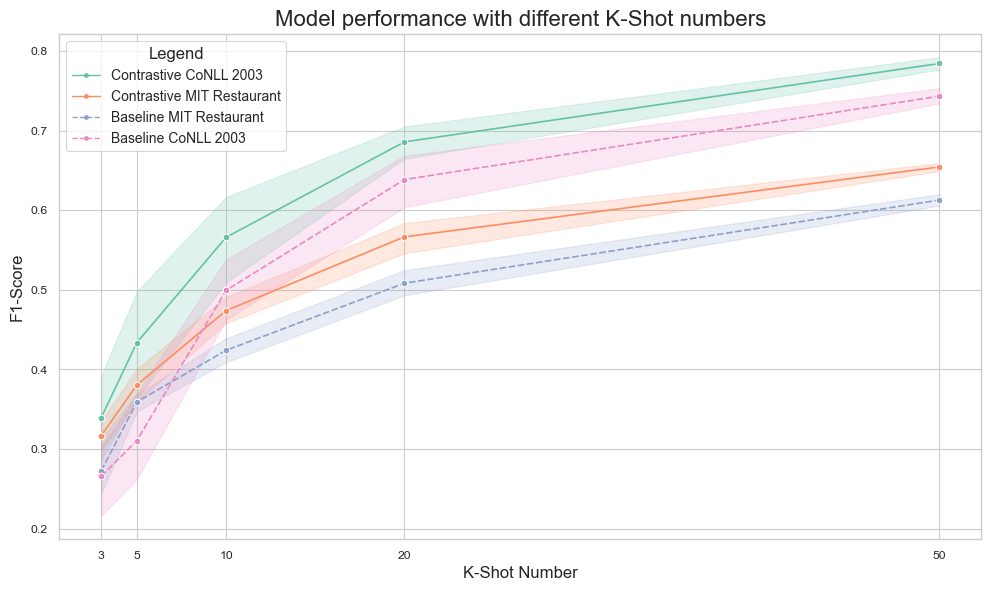

In [177]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='k_shot_num', y='micro avg', hue='run_setting', style="run_type", marker='o')

# Customize the plot
plt.title('Model performance with different K-Shot numbers', fontsize=16)
plt.xlabel('K-Shot Number', fontsize=12)
plt.ylabel('F1-Score', fontsize=12)
plt.legend(title='Corpus and Setting', fontsize=10, title_fontsize=12)


# Get unique values for run_setting and run_type
run_settings = df['run_setting'].unique()
run_types = df['run_type'].unique()

# Create custom handles for the legend
handles = []
labels = []

# Add handles for run_setting (colors)
for setting in run_settings:
    line_drawstyle = "dashed" if "Baseline" in setting else "solid"
    handle = Line2D([0], [0], color=sns.color_palette()[list(run_settings).index(setting)], lw=1, marker=".", linestyle=line_drawstyle)
    handles.append(handle)
    labels.append(setting)

# Set the custom legend
plt.legend(handles=handles, labels=labels, title='Legend', fontsize=10, title_fontsize=12)

unique_k_shots = sorted(df['k_shot_num'].unique())
plt.xticks(unique_k_shots)

# Show the plot
plt.tight_layout()

save_path = Path("output_figs", "k_shot_fig.png")
plt.savefig(save_path, bbox_inches='tight')

plt.show()

In [182]:
meanpmstd = 'Mean ± STD'
stats = df.rename(columns={'k_shot_num': "K Shot", 'run_type': "Run Type", 'run_corpus': "Corpus"}, errors="raise")
stats = stats.groupby(['Corpus', 'Run Type', 'K Shot'])['micro avg'].agg(['mean', 'std'])
stats = stats.round(4)
stats[meanpmstd] = stats['mean'].round(4).astype(str) + ' $\\pm$ ' + stats['std'].round(4).astype(str)
stats = stats[[meanpmstd]]
stats

Mean ± STD
Corpus         Run Type    K Shot                     
CoNLL 2003     Baseline    3       0.2657 $\pm$ 0.0799
                           5       0.3105 $\pm$ 0.0946
                           10      0.4991 $\pm$ 0.0652
                           20      0.6384 $\pm$ 0.0565
                           50      0.7432 $\pm$ 0.0167
               Contrastive 3       0.3393 $\pm$ 0.0924
                           5       0.4337 $\pm$ 0.1119
                           10      0.5658 $\pm$ 0.0893
                           20      0.6857 $\pm$ 0.0355
                           50      0.7842 $\pm$ 0.0137
MIT Restaurant Baseline    3       0.2725 $\pm$ 0.0512
                           5       0.3591 $\pm$ 0.0179
                           10      0.4239 $\pm$ 0.0243
                           20      0.5082 $\pm$ 0.0288
                           50      0.6127 $\pm$ 0.0126
               Contrastive 3       0.3167 $\pm$ 0.0329
                           5        0.3804 $\pm$ 0.035
                           10      0.4738 $\pm$ 0.0273
                           20      0.5664 $\pm$ 0.0327
                           50      0.6543 $\pm$ 0.0086

In [169]:
# meanpmstd = 'Mean ± STD'
# stats = df.rename(columns={'k_shot_num': "K Shot", 'run_type': "Run Type", 'run_corpus': "Corpus"}, errors="raise")
# stats = stats.groupby(['K Shot', 'Run Type', 'Corpus'])['micro avg'].agg(['mean', 'std'])
# stats = stats.round(4)
# stats[meanpmstd] = stats['mean'].round(4).astype(str) + ' ± ' + stats['std'].round(4).astype(str)

# # Reset index to make 'Corpus' a regular column
# stats = stats.reset_index()

# # Separate the corpus into a new DataFrame or modify 'Corpus' as needed
# # stats['Corpus Grouping'] = stats['Corpus']  # This creates a new column with the Corpus name

# # Reorder columns if necessary
# stats = stats[['K Shot', 'Run Type', 'Corpus', meanpmstd]]
# stats

In [183]:
print(stats.style.format(precision=4).to_latex())

\begin{tabular}{llll}
 &  &  & Mean ± STD \\
Corpus & Run Type & K Shot &  \\
\multirow[c]{10}{*}{CoNLL 2003} & \multirow[c]{5}{*}{Baseline} & 3 & 0.2657 $\pm$ 0.0799 \\
 &  & 5 & 0.3105 $\pm$ 0.0946 \\
 &  & 10 & 0.4991 $\pm$ 0.0652 \\
 &  & 20 & 0.6384 $\pm$ 0.0565 \\
 &  & 50 & 0.7432 $\pm$ 0.0167 \\
 & \multirow[c]{5}{*}{Contrastive} & 3 & 0.3393 $\pm$ 0.0924 \\
 &  & 5 & 0.4337 $\pm$ 0.1119 \\
 &  & 10 & 0.5658 $\pm$ 0.0893 \\
 &  & 20 & 0.6857 $\pm$ 0.0355 \\
 &  & 50 & 0.7842 $\pm$ 0.0137 \\
\multirow[c]{10}{*}{MIT Restaurant} & \multirow[c]{5}{*}{Baseline} & 3 & 0.2725 $\pm$ 0.0512 \\
 &  & 5 & 0.3591 $\pm$ 0.0179 \\
 &  & 10 & 0.4239 $\pm$ 0.0243 \\
 &  & 20 & 0.5082 $\pm$ 0.0288 \\
 &  & 50 & 0.6127 $\pm$ 0.0126 \\
 & \multirow[c]{5}{*}{Contrastive} & 3 & 0.3167 $\pm$ 0.0329 \\
 &  & 5 & 0.3804 $\pm$ 0.035 \\
 &  & 10 & 0.4738 $\pm$ 0.0273 \\
 &  & 20 & 0.5664 $\pm$ 0.0327 \\
 &  & 50 & 0.6543 $\pm$ 0.0086 \\
\end{tabular}

